# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.express as px

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('./data/unconv.zip')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

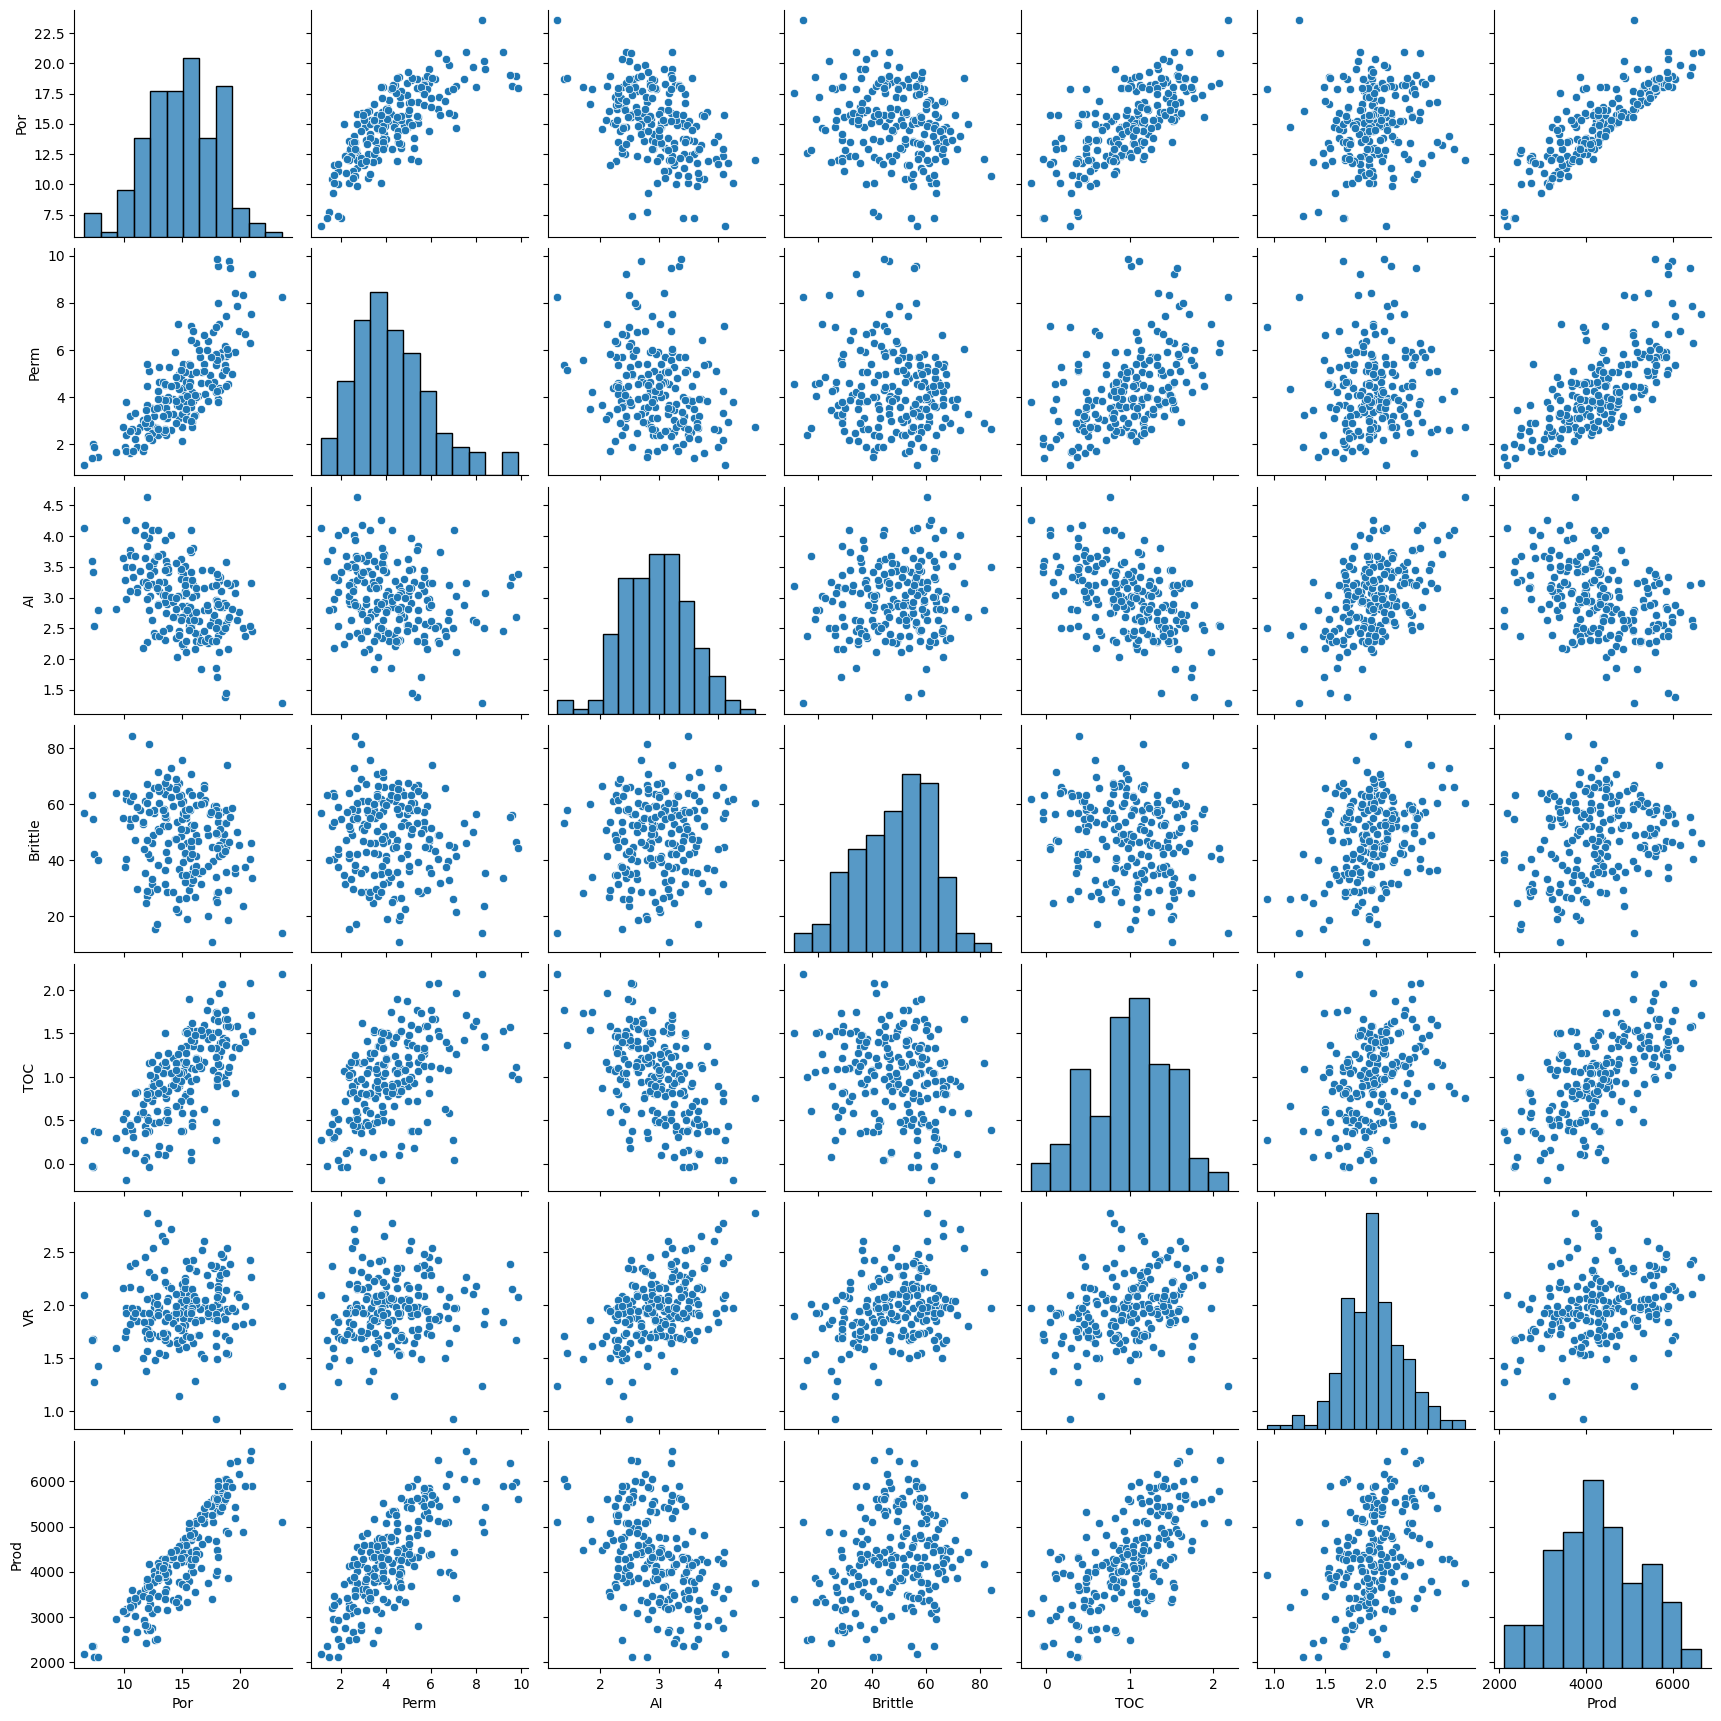

In [3]:
sns.pairplot(data=data.iloc[:, 1:])

Вывод: Предварительно видим зависимость близкую к линейной между признаками Por, Perm и TOC, а также ними и целевой переменной Prod. Точнее покажет корреляционная матрица.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?
Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

Ранг матрицы корреляций: 8
Определитель матрицы корреляций: 0.0007299388072652095


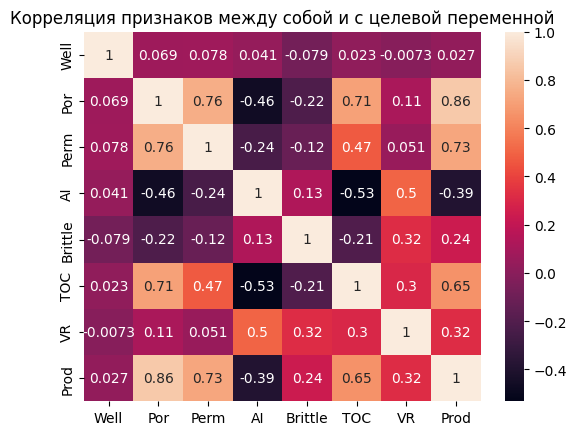

In [4]:
# Ваш код здесь
sns.heatmap(data.corr(), annot=True).set(title='Корреляция признаков между собой и с целевой переменной')

C = data.corr()
print(f'Ранг матрицы корреляций: {np.linalg.matrix_rank(C)}')
print(f'Определитель матрицы корреляций: {np.linalg.det(C)}')

> Выводы по тепловой карте корреляций:
> 
> 1. Самое большое влияние на целевую переменную оказывают признаки Por, Perm, TOC;
> 2. Рост признака AI ведет к снижению целевой переменной;
> 3. Хуже всего скоррелирован с целевой переменной и другими признаками Well, который просто обозначает идентификатор скважины. Его лучше исключить из обучающего и тестового набора данных как неинформативный;
> 4. Наиболее скоррелированы между собой признаки Por, Perm и TOC.
> 
> Ощие выводы:
> 1. Матрица корреляций плохо обусловлена. Определитель близок к нулю;
> 2. Видим мультиколлинеарность межу признаками Por, Perm и TOC;
> 3. Также видим слабую линейную зависимость большинства признаков с целевой переменной;
> 4. По причинам указанным выше линейная регрессия не рекомендуется в качестве модели при таких данных.
>

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
X = data.drop(columns=['Prod'])
y = data['Prod']

# Следуя принципу DRY (Don't repeat yourself - не повторяйся),
# создадим класс линейной регрессии
class LinearRegression():
    """
    Класс модели линейной регрессии с расчетом коэффициентов методом
    наименьших квадратов
    """

    def __init__(self, standartize = False):
        """
        Создание объекта класса LinearRegression

        Args:
            standartize (bool, optional): Если True, то модель стандартизирует
            данные перед расчетом коэффициентов. По умолчанию False.
        """
        self.standartize = standartize
        self.coef_ = None


    def fit(self, X, y):
        """
        Функция расчета коэффициентов линейной регресии методом наименьших квадратов

        Args:
            X (numpy.array, numpy.matrix, pandas.DataFrame): Матрица признаков
            y (numpy.array, numpy.matrix, pandas.Series): Вектор-столбец целевой переменной
        """
        
        # Копируем входные данные во избежание их случайного изменения
        # составляем матрицу наблюдений и вектор целевой переменной

        A = X.values.copy() if isinstance(X, pd.DataFrame) else X.copy()
        A = np.column_stack((np.ones(A.shape[0]), A))
        b = y.values.copy() if isinstance(y, pd.Series) else y.copy()

        if self.standartize:
            # стандартизируем векторы в столбцах матрицы A
            A = A - A.mean()
            A = A / np.linalg.norm(A, axis=0)

            # стандартизируем вектор целевой переменной
            b = b - b.mean()
            b = b / np.linalg.norm(b)

        # Сохраняем рассчитанные коэффициенты в атрибуте класса w_hat
        self.coef_ = np.linalg.inv(A.T@A)@A.T@b


    def predict(self, X):
        """
        Метод для получения предсказаний модели

        Args:
            X (numpy.array, pandas.DataFrame): Матрица входных данных

        Returns:
            numpy.array: вектор-столбец предсказаний
        """
        
        X_ = X.values.copy() if isinstance(X, pd.DataFrame) else X.copy()
        X_ = np.column_stack((np.ones(X_.shape[0]), X_))
        
        return X_ @ self.coef_

model = LinearRegression()
model.fit(X, y)
w_hat = pd.Series(np.round(model.coef_[1:]), index=X.columns)
w_hat

Well         0.0
Por        230.0
Perm       116.0
AI        -365.0
Brittle     25.0
TOC        -78.0
VR         785.0
dtype: float64

> Выводы:

> 1. Идентификатор скважины Well не информативен и должен быть исключен из тренировочного набора данных;
> 2. Помимо TOC видим отрицательное влияние на целевую переменную признака AI. Это подтверждается и матрицей корреляций;
> 3. Определить какой признак вносит больший вклад в целевую переменную, а какой меньше не представляется возможным в виду того, что мы не стандартизировали данные и целевую переменную.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Предсказание на одном примере
x = np.matrix("106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42")
y_pred = model.predict(x)
y_true = 4748.315024
abs_error = np.abs(y_true - y_pred)[0, 0]
mape = abs_error / y_true
print(f'Средняя процентная ощибка (MAPE) для представленных данных: {mape:.2%}')

Средняя процентная ощибка (MAPE) для представленных данных: 0.53%


In [7]:
# Предсказание на всей обучающей выборке
y_pred = model.predict(X)

# Для оценки качества модели применим среднюю процентную ошибку MAPE
mape = (np.abs(y - y_pred) / y).mean()
print(
    f'Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: {mape:.2%}')


Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: 3.63%


> Выводы:
> Несмотря на то, что мы еще не произвели отбор признаков и в них наблюдается мультиколлинеарность, а также есть один неинформативный признак, точность модели более 96% уже позволяет использовать её на практике. Попробуем улучшить этот результат и посмотрим, что получится.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [8]:
# Выделим корреляции признаков с целевой переменной
prod_corr = data.corr()['Prod'].iloc[:-1]

# Создадим для наглядности DataFrame
report = pd.DataFrame(
    data={
        'Коэффициент модели': np.round(model.coef_[1:]),
        'Корреляция с целевой переменной': prod_corr
    },
    index=prod_corr.index
)

def sign_match(vec):
    return  "Да" if (vec[0] < 0) == (vec[1] < 0) else "Нет"

report['Знаки совпадают'] = report[
    [
        'Коэффициент модели',
        'Корреляция с целевой переменной'
    ]].apply(sign_match, axis=1)

report



,Коэффициент модели,Корреляция с целевой переменной,Знаки совпадают
Well,0.0,0.026817,Да
Por,230.0,0.861910,Да
Perm,116.0,0.727426,Да
AI,-365.0,-0.390835,Да
Brittle,25.0,0.237155,Да
TOC,-78.0,0.654445,Нет
VR,785.0,0.323182,Да


> Выводы:
> 1. Видим, что коэффициент модели для признака TOC имеет отрицательное значение в то время как его корреляция с целевой переменной положительна;
> 2. Положительную линейную связь мы ранее наблюдали и на точечных диаграммах;
> 3. Такое расхождение связано с мультиколлинеарностью признаков Por, Perm и TOC;
> 4. В дальшейшем моделировании стоит исключить признак Perm, имеющий более низкую корреляцию по сравнению с признаком Por;
> 5. Также исключим неинформативный признак Well.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [9]:
# Ранее я уже сделал вывод, что признак Well неинформативен,
# а признак Perm исключаем из-за его сильной корреляции с признаком Por,
# который в свою очередь сильнее скоррелирован с целевой переменной Prod

X = data.drop(columns=['Well', 'Perm', 'Prod'])

model = LinearRegression()
model.fit(X, y)
w_hat = pd.Series(np.round(model.coef_[1:]), index=X.columns)
display(w_hat)

y_pred = model.predict(X)

# Для оценки качества модели применим среднюю процентную ошибку MAPE
mape = (np.abs(y - y_pred) / y).mean()
print(
    f'Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: {mape:.2%}')


Por        290.0
AI        -140.0
Brittle     29.0
TOC         89.0
VR         407.0
dtype: float64

Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: 4.02%


> Как ни странно, но метрика MAPE вместо снижения, наоборот выросла после удаления признака Perm. Наблюдаем очень странное поведение этой метрики. Попробуем исключить не признак Perm, а признак Por:

In [10]:
X = data.drop(columns=['Well', 'Por', 'Prod'])

model = LinearRegression()
model.fit(X, y)
w_hat = pd.Series(np.round(model.coef_[1:]), index=X.columns)
display(w_hat)

y_pred = model.predict(X)

# Для оценки качества модели применим среднюю процентную ошибку MAPE
mape = (np.abs(y - y_pred) / y).mean()
print(
    f'Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: {mape:.2%}')


Perm        348.0
AI         -875.0
Brittle      16.0
TOC          27.0
VR         1531.0
dtype: float64

Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: 7.24%


> Да нет, правильно делали, что исключали именно Perm. Видим, что при исключенном признаке Por метрика MAPE выросла почти вдвое.
> По видимому небольшое ухудшение метрики MAPE при исключении признака Perm связано с тем, что ранее модель несколько переобучалась. Точно убедиться в этом можно было бы протестировав модель на тестовом наборе данных, которого нет, да и в заданиях пока не было не слова о разделении данных на тренировочную и тестовую выборки. Едем дальше...

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [11]:
from sklearn import linear_model

X = data.drop(columns=['Well', 'Perm', 'Prod'])

model = linear_model.LinearRegression()

model.fit(X, y)
display(pd.Series((np.round(model.coef_)), index=X.columns))

y_pred = model.predict(X)
# Для оценки качества модели применим среднюю процентную ошибку MAPE
mape = (np.abs(y - y_pred) / y).mean()
print(
    f'Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: {mape:.2%}')

Por        290.0
AI        -140.0
Brittle     29.0
TOC         89.0
VR         407.0
dtype: float64

Метрика MAPE полученной модели линейной регреcсии на обучающем наборе данных: 4.02%


In [12]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

> Видим, что коэффициенты линейной регрессии совпадают, как и метрика MAPE. Значит наша модель линейной регрессии считает всё правильно.

Проведем тестирование модели линейной регрессии без полиномиальных признаков используя кросс-валидацию на пяти фолдах.

In [13]:
from sklearn.model_selection import cross_validate

In [14]:
# Создадим словарь для сохранения результатов тестирования,
# который используем в конце работы при подготовке итогового
# отчета
test_results = {
    'model': [],
    'params': [],
    'polynomial': [],
    'train_mape': [],
    'validation_mape': []
}

# Создадим функцию для получения метрик MAPE
# с ипользованием кросс-валидации
def get_metrics(model, X, y, cv=5):
    # оцениваем качество модели на кросс-валидации
    cv_results = cross_validate(
        model, X, y,
        scoring='neg_mean_absolute_percentage_error',
        cv=cv, return_train_score=True)

    return (
        -cv_results['train_score'].mean(),
        -cv_results['test_score'].mean()
    )

# Создадим функцию для вывода отчета о метриках
def report(metrics):

    print(f'MAPE на тренировочных фолдах: {metrics[0]:.2%}')

    print(f'MAPE на валидационных фолдах: {metrics[1]:.2%}')

# Создадим функцию для сохранения результатов теста
def save_results(test_results, model_name, params, polynomial, train_mape, validation_mape):
    test_results['model'].append(model_name)
    test_results['params'].append(params)
    test_results['polynomial'].append(polynomial)
    test_results['train_mape'].append(train_mape)
    test_results['validation_mape'].append(validation_mape)

# Получим метрики
metrics = get_metrics(model, X, y)

# Выведем отчет
report(metrics)

# Сохраним результат для итогового отчета
save_results(
    test_results=test_results,
    model_name='Simple LinearRegression',
    params = None,
    polynomial=False,
    train_mape=metrics[0],
    validation_mape=metrics[1]
)

MAPE на тренировочных фолдах: 4.00%
MAPE на валидационных фолдах: 4.26%


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [16]:
# выделяем интересующие нас факторы
X = data.drop(columns=['Well', 'Perm', 'Prod'])
y = data[['Prod']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()

# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

print(
    f'Количество признаков после генерации полиномиальных: {X.shape[1]}')

# создаём модель линейной регрессии
model = LinearRegression()

# Получим метрики
metrics = get_metrics(model, X, y)

# Выведем отчет
report(metrics)

# Сохраним результат для итогового отчета
save_results(
    test_results=test_results,
    model_name='LinearRegression on Polynomial features',
    params=None,
    polynomial=True,
    train_mape=metrics[0],
    validation_mape=metrics[1]
)


Количество признаков после генерации полиномиальных: 55
MAPE на тренировочных фолдах: 1.45%
MAPE на валидационных фолдах: 2.84%


> Видим, что добавление полиномиальных признаков и стандартизация улучшили точность модели, однако наблюдаем некотрое переобучение модели (на тренировчных фолдах метрика MAPE почти вдвое ниже, чем на валидационных)

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [17]:
# Так как модель просчитывается довольно быстро,
# для подбора коэффициента регуляризации alpha
# применим GridSearchCV
from sklearn.model_selection import GridSearchCV

# Создаем решетку параметров
param_grid = {
    'alpha': np.linspace(0.1, 10, 100)
}

# Производим подбор alpha с кросс-валидацией на 5 фолдах
gs = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5)

# Факторы X были стандартизированы ранее
gs.fit(X, y)

# Посмотрим, что получилось
alpha = gs.best_params_["alpha"]
print(f'Наилучшие реузльтаты получены при alpha = {alpha}')

# Получим метрики для лучшей модели
metrics = get_metrics(gs.best_estimator_, X, y)

# Выведем отчет
report(metrics)

# Сохраним результат для итогового отчета
save_results(
    test_results=test_results,
    model_name='Lasso',
    params=f'alpha={alpha}',
    polynomial=True,
    train_mape=metrics[0],
    validation_mape=metrics[1]
)


Наилучшие реузльтаты получены при alpha = 4.1
MAPE на тренировочных фолдах: 1.68%
MAPE на валидационных фолдах: 2.12%


> Видим, что метрика MAPE на тренировочных фолдах для модели Lasso чуть выросла по сравнению с моделью линейной регрессии без регуляризации, при этом метрика MAPE снизилась. Это говорит о том, что $L_1$-регуляризация с $\alpha=4.1$ позволила уменьшить переобучение модели, уменьшив разборс моделии за счет увеличения её смещения.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [18]:
# Так как модель просчитывается довольно быстро,
# для подбора коэффициента регуляризации alpha
# применим GridSearchCV
from sklearn.model_selection import GridSearchCV

# Создаем решетку параметров
param_grid = {
    'alpha': np.linspace(0.1, 10, 100)
}

# Производим подбор alpha с кросс-валидацией на 5 фолдах
gs = GridSearchCV(
    Ridge(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5)

# Факторы X были стандартизированы ранее
gs.fit(X, y)

# Посмотрим, что получилось
alpha = gs.best_params_["alpha"]
print(f'Наилучшие реузльтаты получены при alpha = {alpha}')

# Получим метрики для лучшей модели
metrics = get_metrics(gs.best_estimator_, X, y)

# Выведем отчет
report(metrics)

# Сохраним результат для итогового отчета
save_results(
    test_results=test_results,
    model_name='Ridge',
    params=f'alpha={alpha}',
    polynomial=True,
    train_mape=metrics[0],
    validation_mape=metrics[1]
)

Наилучшие реузльтаты получены при alpha = 0.8
MAPE на тренировочных фолдах: 1.51%
MAPE на валидационных фолдах: 2.55%


> Видим, что $L_2$-регуляризация с наилучшим значением $\alpha=0.8$ также снизила переобучение модели, но справилась с этой задачей чуть хуже, чем $L_1$-регуляризация.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [19]:
# Так же как и ранее применим GridSearchCV

# Создаем решетку параметров
param_distributions = {
    'alpha': np.linspace(0.1, 10, 100),
    'l1_ratio': np.linspace(0.1, 1, 10),
}

# Производим подбор alpha с кросс-валидацией на 5 фолдах
gs = GridSearchCV(
    ElasticNet(max_iter=10000),
    param_grid=param_distributions,
    scoring='neg_mean_absolute_percentage_error',
    cv=5)

gs.fit(X, y)

# Посмотрим, что получилось
alpha = gs.best_params_["alpha"]
l1_ratio = gs.best_params_["l1_ratio"]
print(f'Наилучшие реузльтаты получены при alpha = {alpha} и l1_ratio = {l1_ratio}')

# Получим метрики для лучшей модели
metrics = get_metrics(gs.best_estimator_, X, y)

# Выведем отчет
report(metrics)

# Сохраним результат для итогового отчета
save_results(
    test_results=test_results,
    model_name='ElasticNet',
    params=f'alpha={alpha}, l1_ratio={l1_ratio}',
    polynomial=True,
    train_mape=metrics[0],
    validation_mape=metrics[1]
)


Наилучшие реузльтаты получены при alpha = 4.1 и l1_ratio = 1.0
MAPE на тренировочных фолдах: 1.68%
MAPE на валидационных фолдах: 2.12%


> Видим, что значения метрик получились в точности такие же, как и для модели Lasso. Параметр alpha также равен 4.1 и параметр l1_ratio равный 1 по сути полностью отключил $L_2$-регуляризацию в модели ElasticNet.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [20]:
# Создадим DataFrame для отчета
report = pd.DataFrame(test_results)
report

,model,params,polynomial,train_mape,validation_mape
0,Simple LinearRegression,None,False,0.040010,0.042550
1,LinearRegression on Polynomial features,None,True,0.014519,0.028409
2,Lasso,alpha=4.1,True,0.016804,0.021201
3,Ridge,alpha=0.8,True,0.015102,0.025537
4,ElasticNet,"alpha=4.1, l1_ratio=1.0",True,0.016804,0.021201


> Для имеющихся данных наилучшей моделью линейной регрессии оказалась модель Lasso с параметром alpha=4.1 на полиномиальных признаках